# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Step 1: Reading the Data

In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
demand = pd.read_csv("day.csv")

In [3]:
demand.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
demand.shape

(730, 16)

***Droping the instant column***

In [5]:
demand.drop(['instant'],axis=1,inplace=True)

***We already have weekday month columns so we can drop the dteday column***

In [6]:
demand.drop(['dteday'],axis=1,inplace=True)

In [7]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [8]:
demand.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [10]:
demand.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## Step 2: Visualising and Understanding the Data (EDA)

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [11]:
#Lets first Define Function Univariate.
def univariate(df,col):
        sns.set(style="darkgrid")
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
        plt.show()
    
   
        
    

***Analysis on Column: cnt***

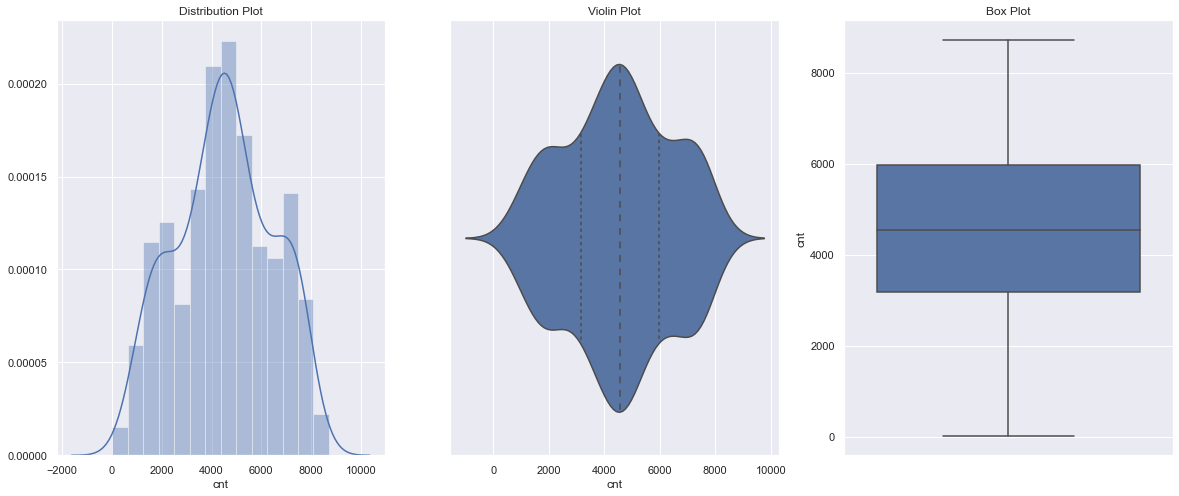

In [12]:
#Lets carry out Univariate analysis on cnt
univariate(df=demand,col='cnt')

- Data is normally distributed bet ween 0 to 10000, mean is 4500

***Analysis on Columns: registered & Casual***

***The target variable(cnt) is the sum of the both registered and casual columns, 
So these columns are not usefull to predict target variable we can drop these columns***

In [13]:
demand.drop(['casual','registered'],axis=1,inplace=True)

***Analysis on Column: windspeed***

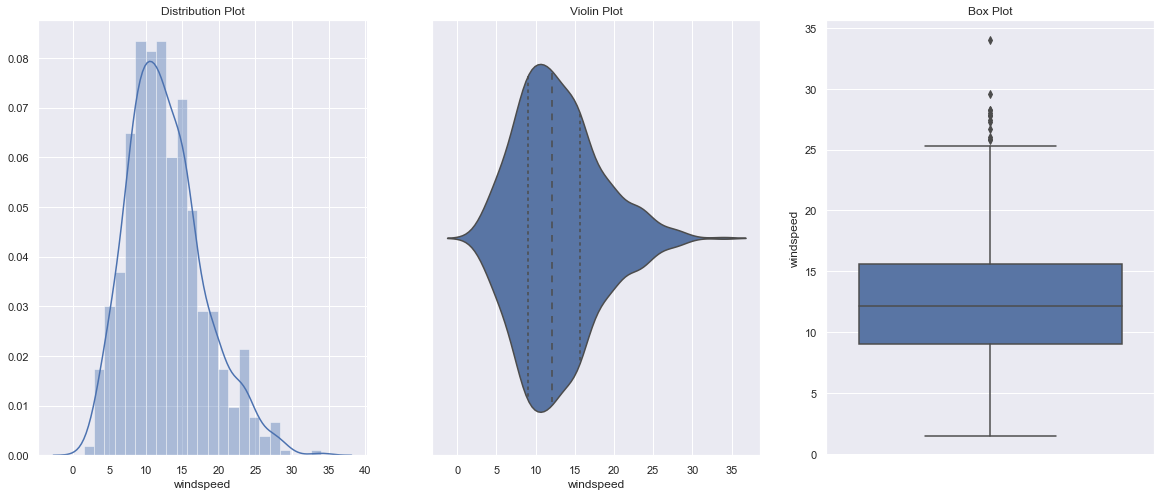

In [14]:
#Lets carry out Univariate analysis on windspeed
univariate(df=demand,col='windspeed')

- windspeed column is normally distributed between 1 to 30 with mean of 12

***Analysis on Column: hum***

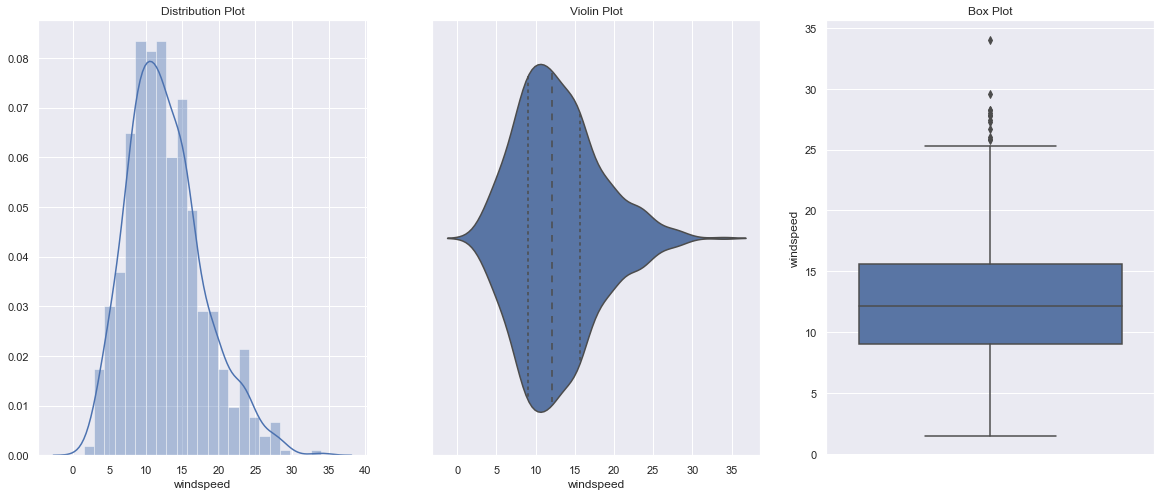

In [15]:
#Lets carry out Univariate analysis on hum
univariate(df=demand,col='windspeed')

- humudity column data is right skewed normal distribution with mean of 62

***Analysis on Column: atemp & temp***

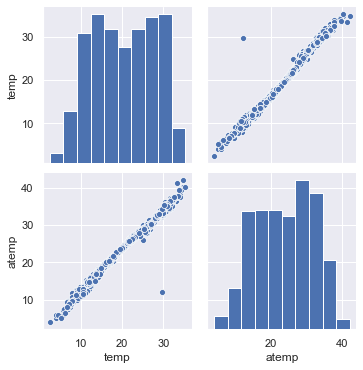

In [16]:
sns.pairplot(demand[['temp','atemp']])
plt.show()

***Predictor columns temp and a temp are very much correlated to each other, so we can drop them***

In [17]:
demand.drop(['atemp'],axis=1,inplace=True)

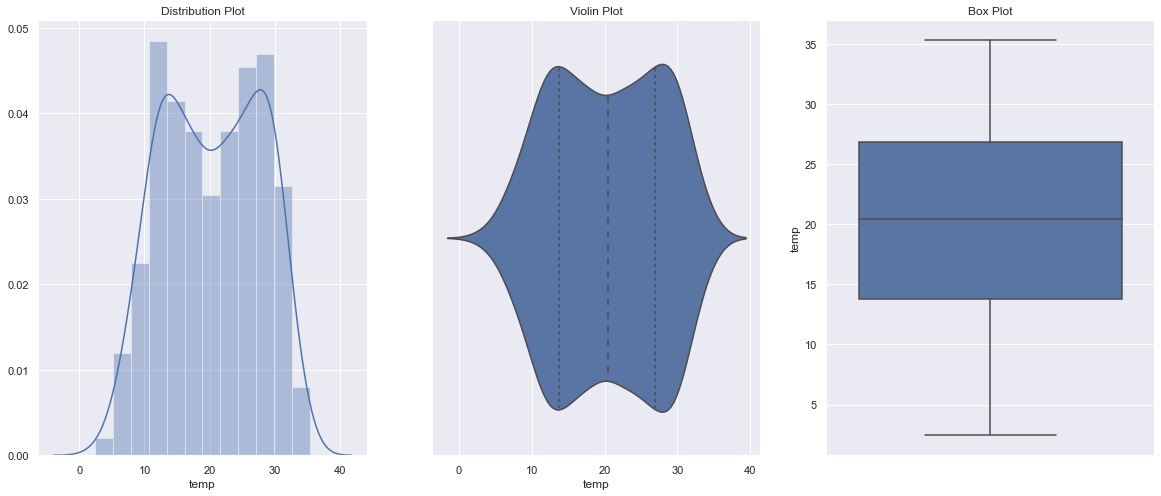

In [18]:
#Lets carry out Univariate analysis on temp
univariate(df=demand,col='temp')

- atemp column data is right skewed normal distribution with mean of 20


### Correlation Matrix and Heat Map

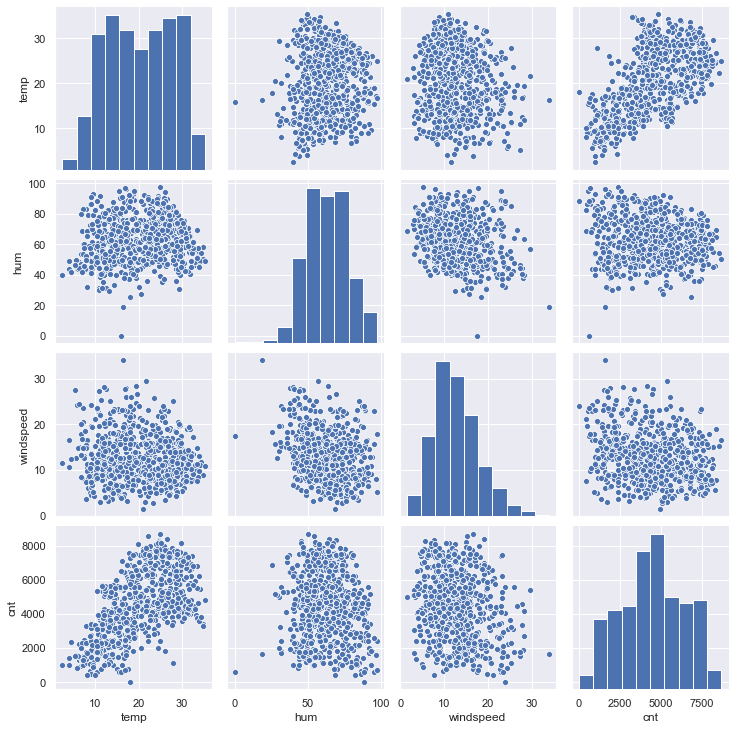

In [19]:
sns.pairplot(demand.drop(['season','mnth','yr','holiday','workingday','weekday','weathersit'],axis=1))
plt.show()

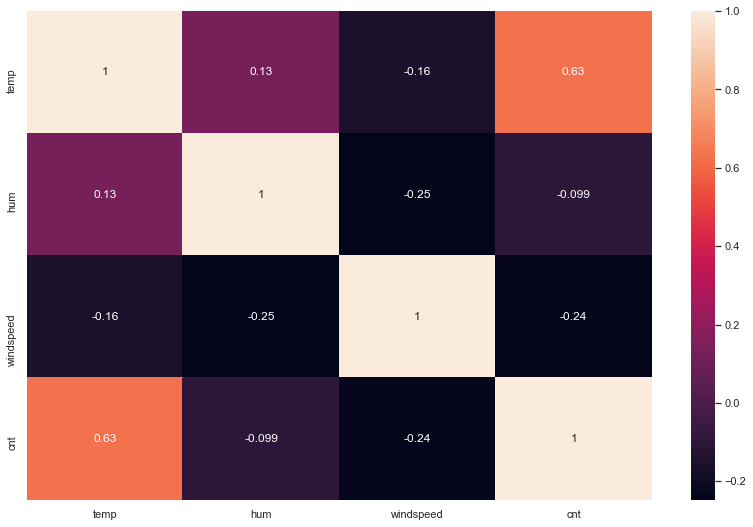

In [20]:
corr_df= demand.drop(['season','mnth','yr','holiday','workingday','weekday','weathersit'],axis=1).corr()
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values,annot= True)
plt.show()

#### Q) Looking at the pair-plot among the numerical variables, which one has the highest correlation with the target variable?
  Ans: By looking at the pair plot **<i>temp variable</i>** has the highest (0.63) correlation with target variable.
  
***Yes, There are some independent variables has positively correlated with target variables. We should consider Linear Regression Model.***

#### Visualising Categorical Variables

As you see we have some categorical variables we will use catplot to visualise with target variable.

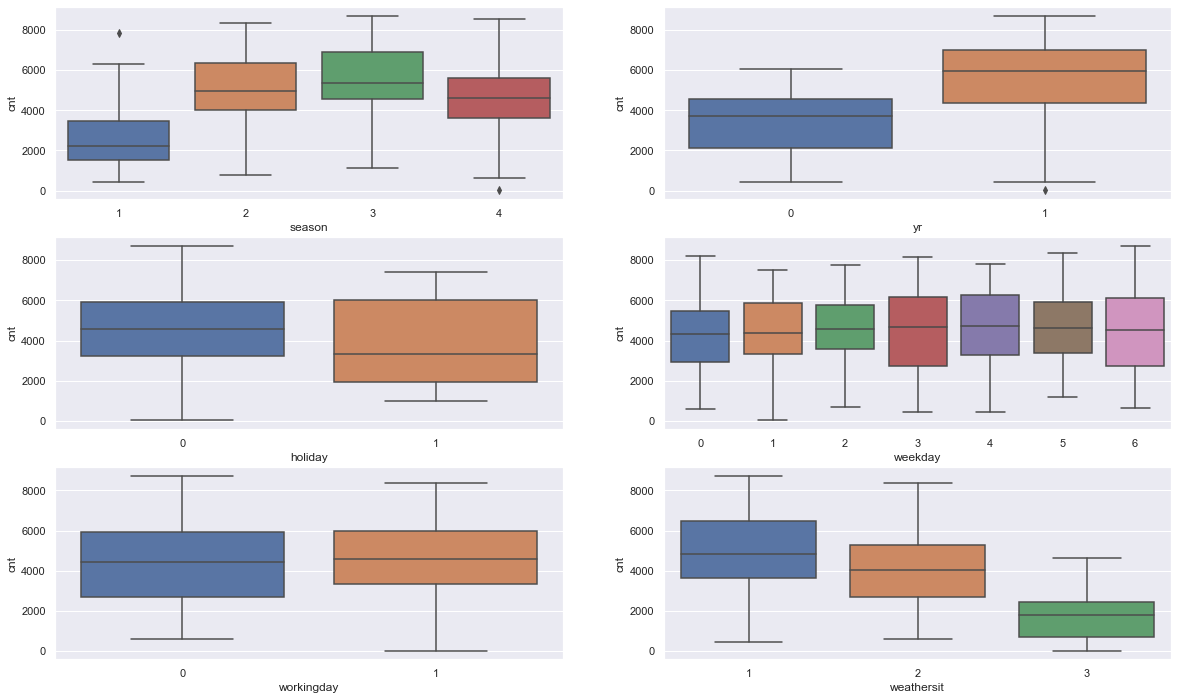

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = demand)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = demand)
plt.subplot(3,2,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = demand)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = demand)
plt.subplot(3,2,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = demand)
plt.subplot(3,2,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = demand)
plt.show()

***Season,holiday and weathersit has the  positively correlated with the target variable***

- In Season summer and fall, non holidays and in weathersit Clear, Few clouds, Partly cloudy, Partly cloudy has the correlation with target variable

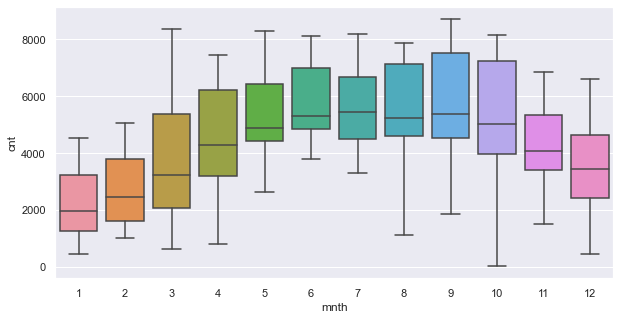

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = demand)
plt.show()

- In categorical variables also we have some of the variables positively correlated with target variable

#### Q) From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?
  Ans: 
  - Season,holiday and weathersit has the positive effect on the dependent variable.
  - In Season summer and fall, non holidays and in weathersit Clear, Few clouds, Partly cloudy, Partly cloudy has the positive effect on the dependent variable.
  -  In month variable the mid months have the positive effect on the dependent variable

In [23]:
demand.shape

(730, 11)

***We ended up having 11 columns and 730 rows***

## Step 3: Data Preparation

***Now we can replace categorical column values with ther original values***
- replacing season,mnth,yr,weekday and weathersit withe their values.

In [24]:
demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [25]:
season_values={1:'spring',2:'summer',3:'fall',4:'winter'}

In [26]:
demand['season'] = demand['season'].map(season_values)

In [27]:
month_values={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

In [28]:
demand['mnth'] = demand['mnth'].map(month_values)

In [29]:
year_values={0:2018,1:2019}

In [30]:
demand['yr'] = demand['yr'].map(year_values)

In [31]:
weekday_values={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}

In [32]:
demand['weekday'] = demand['weekday'].map(weekday_values)

In [33]:
weathersit_values={1:'Clear',2:'Mist_Cloudy',3:'Light_Snow',4:'Heavy_Rain'}

In [34]:
demand['weathersit'] = demand['weathersit'].map(weathersit_values)

### Creating Dummy Variables

***We can create dummy variables on categorical variables season,yr, mnth, weekday, and weathersit.***

In [35]:
demand=pd.get_dummies(data=demand, columns=['season', 'mnth','yr','weekday','weathersit'], drop_first = True)

In [36]:
demand.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,...,mnth_September,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist_Cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

Now we can split data into two parts test data and train data, train and test data always have same rows

In [37]:
np.random.seed(0)
demand_train, demand_test = train_test_split(demand, train_size = 0.7, test_size = 0.3, random_state = 100)

#### If you observe windspeed, hum,temp and cnt have larger integer values, we can rescale the variables so that they have a comparable scale.

I have used StandardScaler to scale the features

In [38]:
scaler = StandardScaler()

In [39]:
#We can apply scaller to all columns except dummy variables
scale_columns=['cnt','temp','hum','windspeed']
demand_train[scale_columns] = scaler.fit_transform(demand_train[scale_columns])

In [40]:
demand_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,...,mnth_September,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist_Cloudy
653,0,1,-0.121335,-0.514725,-0.117752,1.562685,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
576,0,1,1.231731,0.516433,-0.330615,1.399629,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
426,0,0,-0.420478,-0.069854,-0.385694,-0.215554,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
728,0,0,-1.294913,-1.045032,2.018143,-1.379511,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
482,0,0,-0.627580,-1.000840,-0.779889,-0.136589,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1


### Now we can plot correlation matrix for  demand_train data

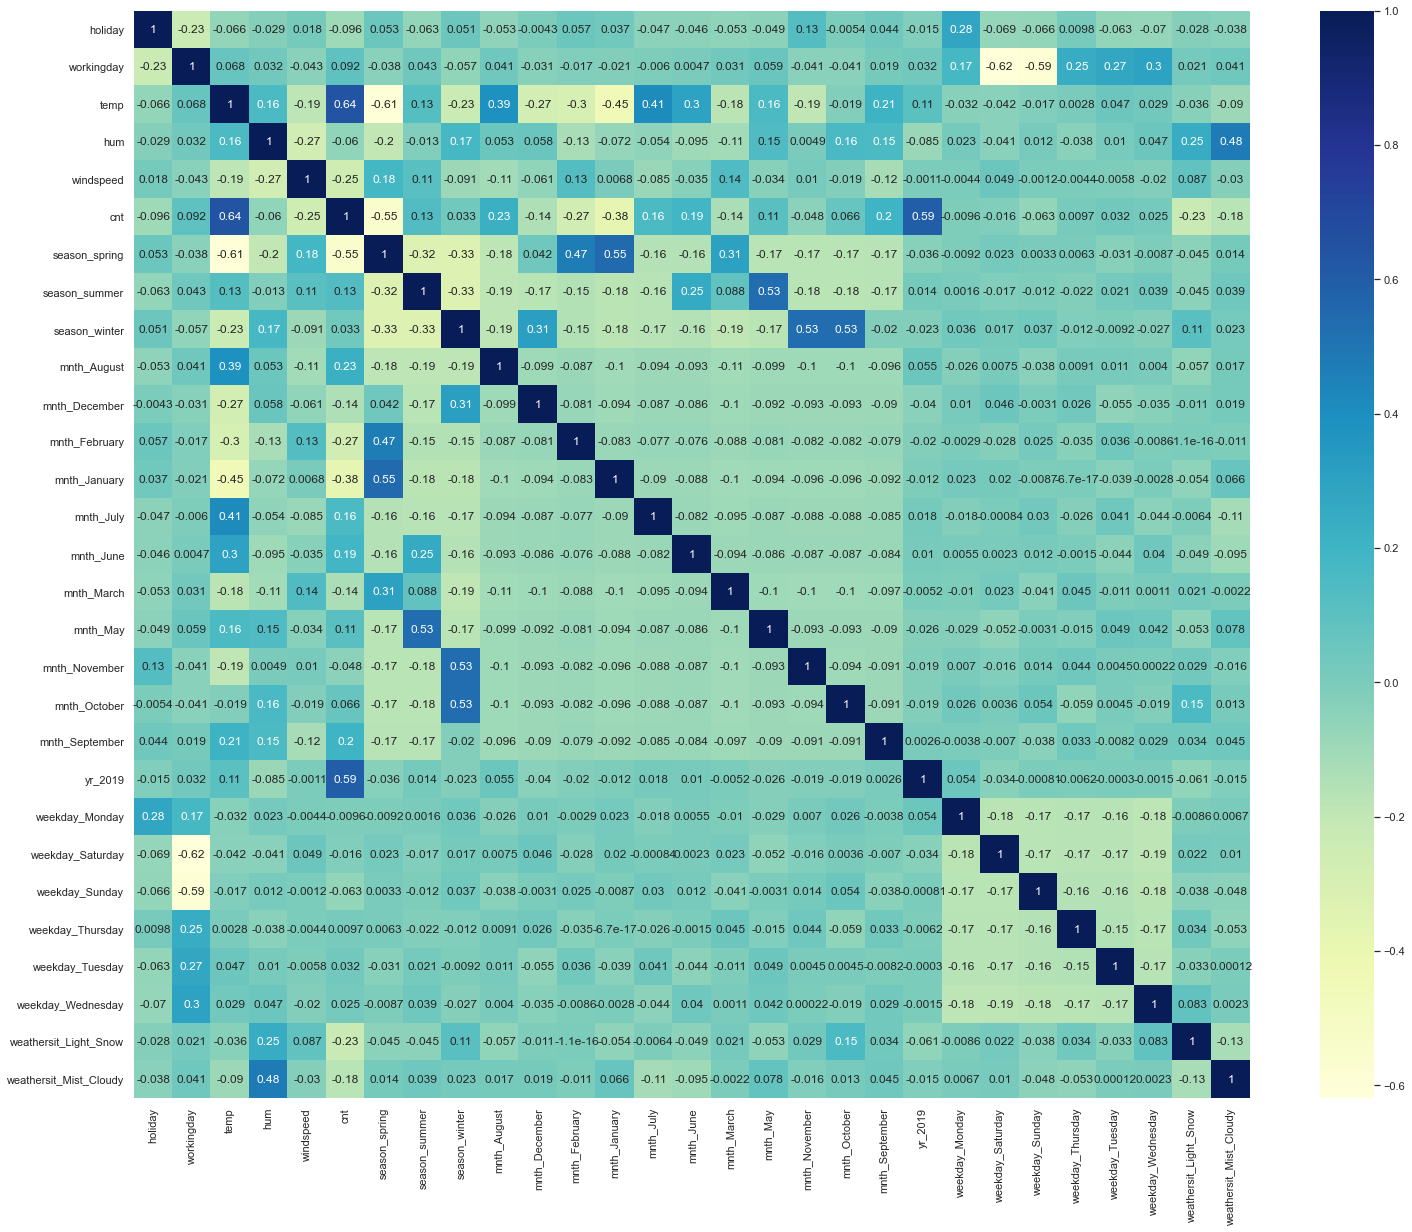

In [240]:
plt.figure(figsize = (25, 20))
sns.heatmap(demand_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### If we observe `temp` seems to the correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

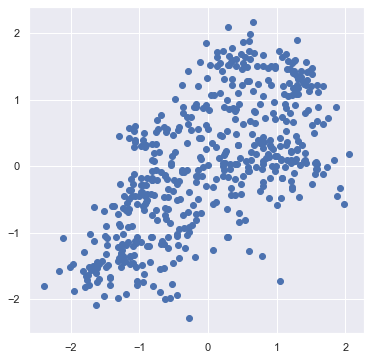

In [41]:
plt.figure(figsize=[6,6])
plt.scatter(demand_train.temp, demand_train.cnt)
plt.show()

So, we pick `temp` as the first variable and we'll try to fit a regression line to that.

### Dividing data into X and Y sets for the model building

In [42]:
y_train = demand_train.pop('cnt')
X_train = demand_train

## Step 5: Building a linear model

Fit a regression line using `statsmodels`.

In [43]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [44]:
# Check the parameters obtained

lr.params

const                    -0.440088
holiday                  -0.338715
workingday                0.048700
temp                      0.453072
hum                      -0.098301
windspeed                -0.140963
season_spring            -0.214639
season_summer             0.172591
season_winter             0.471747
mnth_August               0.064197
mnth_December            -0.203171
mnth_February            -0.143876
mnth_January             -0.279788
mnth_July                -0.179835
mnth_June                -0.013248
mnth_March                0.004658
mnth_May                  0.106697
mnth_November            -0.186526
mnth_October              0.033576
mnth_September            0.361274
yr_2019                   1.034512
weekday_Monday           -0.093179
weekday_Saturday          0.046493
weekday_Sunday           -0.196566
weekday_Thursday         -0.041167
weekday_Tuesday          -0.084190
weekday_Wednesday        -0.024011
weathersit_Light_Snow    -1.147391
weathersit_Mist_Clou

In [45]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          8.74e-182
Time:                        00:08:45   Log-Likelihood:                -234.21
No. Observations:                 510   AIC:                             524.4
Df Residuals:                     482   BIC:                             643.0
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

### Dropping the Variable and Updating the Model

The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis.Predictor that has a low p-value is likely to be a meaningful addition to th model. SO we can drop variables having p value > 0.05

#### We have high P value for mnth_March feature, so we can drop the column and fit the model again

In [46]:
X_train=X_train.drop('mnth_March', 1)

In [47]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [48]:
# Print the summary of the model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          8.33e-183
Time:                        00:08:46   Log-Likelihood:                -234.22
No. Observations:                 510   AIC:                             522.4
Df Residuals:                     483   BIC:                             636.8
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

#### We have high P value for mnth_March feature, so we can drop the column and fit the model again

In [49]:
X_train=X_train.drop('mnth_June', 1)

In [50]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [51]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.6
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          7.84e-184
Time:                        00:08:47   Log-Likelihood:                -234.23
No. Observations:                 510   AIC:                             520.5
Df Residuals:                     484   BIC:                             630.5
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

#### We have high P value for mnth_October   feature, so we can drop the column and fit the model again

In [52]:
X_train=X_train.drop('mnth_October', 1)

In [53]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     117.5
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          7.40e-185
Time:                        00:08:48   Log-Likelihood:                -234.26
No. Observations:                 510   AIC:                             518.5
Df Residuals:                     485   BIC:                             624.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

#### We have high P value for weekday_Wednesday  feature, so we can drop the column and fit the model again

In [55]:
X_train=X_train.drop('weekday_Wednesday', 1)

In [56]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [57]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.8
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          7.06e-186
Time:                        00:08:50   Log-Likelihood:                -234.33
No. Observations:                 510   AIC:                             516.7
Df Residuals:                     486   BIC:                             618.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

#### We have high P value for weekday_Thursday   feature, so we can drop the column and fit the model again

In [58]:
X_train=X_train.drop('weekday_Thursday', 1)

In [59]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [60]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          6.87e-187
Time:                        00:08:51   Log-Likelihood:                -234.45
No. Observations:                 510   AIC:                             514.9
Df Residuals:                     487   BIC:                             612.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [61]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,22.37
5,season_spring,8.55
6,season_summer,6.57
7,season_winter,6.29
18,weekday_Saturday,5.94
19,weekday_Sunday,5.29
2,temp,4.92
8,mnth_August,3.17
12,mnth_July,2.80
11,mnth_January,2.38


 the variable `workingday` has a significantly high VIF (`22.37`) and a high p-value (`0.337`) as well. Hence, this variable isn't of much use and should be dropped.

In [62]:
X_train=X_train.drop('workingday', 1)

In [63]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [64]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     128.6
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          6.87e-187
Time:                        00:08:53   Log-Likelihood:                -234.45
No. Observations:                 510   AIC:                             514.9
Df Residuals:                     487   BIC:                             612.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [65]:
# Calculate the VIFs again for the model
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.20
4,season_spring,4.16
6,season_winter,3.03
10,mnth_January,2.53
5,season_summer,2.44
21,weathersit_Mist_Cloudy,2.31
15,yr_2019,2.10
9,mnth_February,1.98
13,mnth_November,1.90
2,hum,1.89


#### We have high P value for weekday_Saturday feature, so we can drop the column and fit the model again

In [66]:
X_train=X_train.drop('weekday_Saturday', 1)

In [67]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [68]:
# Print the summary of the model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     135.0
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          6.27e-188
Time:                        00:08:55   Log-Likelihood:                -234.53
No. Observations:                 510   AIC:                             513.1
Df Residuals:                     488   BIC:                             606.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

#### We have high P value for mnth_August  feature, so we can drop the column and fit the model again

In [69]:
X_train=X_train.drop('mnth_August', 1)

In [70]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_lm).fit()

In [71]:
# Print the summary of the model

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     141.9
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          6.40e-189
Time:                        00:08:58   Log-Likelihood:                -234.75
No. Observations:                 510   AIC:                             511.5
Df Residuals:                     489   BIC:                             600.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [72]:
#### We have high P value for weekday_Tuesday  feature, so we can drop the column and fit the model again

In [73]:
X_train=X_train.drop('weekday_Tuesday', 1)

In [74]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_lm).fit()

In [75]:
# Print the summary of the model

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     149.1
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          1.13e-189
Time:                        00:08:59   Log-Likelihood:                -235.56
No. Observations:                 510   AIC:                             511.1
Df Residuals:                     490   BIC:                             595.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

#### We have high P value for weekday_Monday feature, so we can drop the column and fit the model again

In [76]:
X_train=X_train.drop('weekday_Monday', 1)

In [77]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_lm).fit()

In [78]:
# Print the summary of the model

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     157.1
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          1.96e-190
Time:                        00:09:01   Log-Likelihood:                -236.40
No. Observations:                 510   AIC:                             510.8
Df Residuals:                     491   BIC:                             591.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

In [79]:
#### We have high P value for mnth_May feature, so we can drop the column and fit the model again

In [80]:
X_train=X_train.drop('mnth_May', 1)

In [81]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_lm).fit()

In [82]:
# Print the summary of the model

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.9
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          4.04e-191
Time:                        00:09:02   Log-Likelihood:                -237.43
No. Observations:                 510   AIC:                             510.9
Df Residuals:                     492   BIC:                             587.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

#### We have high P value for mnth_February  feature, so we can drop the column and fit the model again

In [83]:
X_train=X_train.drop('mnth_February', 1)

In [84]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_12 = sm.OLS(y_train, X_train_lm).fit()

In [85]:
# Print the summary of the model

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     175.5
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          1.11e-191
Time:                        00:09:03   Log-Likelihood:                -238.79
No. Observations:                 510   AIC:                             511.6
Df Residuals:                     493   BIC:                             583.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0

## Step 7: Residual Analysis of the train data

In [86]:
y_train_price = lr_12.predict(X_train_lm)

Text(0.5, 0, 'Errors')

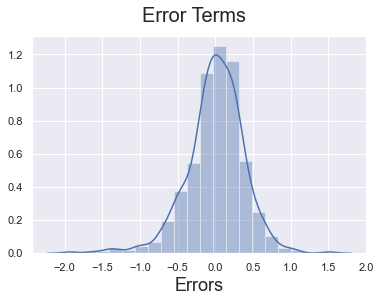

In [87]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Step 8: Making Predictions Using the Final Model

#### The model lr_12 looks good because there are no features which is >0.05 and all the features VIF is around 2

***We can make predictions***

In [88]:
scale_columns=['cnt','temp','hum','windspeed']
demand_test[scale_columns] = scaler.transform(demand_test[scale_columns])

In [89]:
demand_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,mnth_August,...,mnth_September,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow,weathersit_Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.096083,-0.081388,-0.043731,0.031073,0.255708,0.264840,0.232877,0.059361,...,0.086758,0.479452,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.188034,0.459904,1.035793,1.022197,0.942916,0.973536,0.437258,0.442259,0.423633,0.236840,...,0.282125,0.500722,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,-2.174744,-2.665411,-2.143341,-2.074296,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-0.809372,-0.844689,-0.720691,-0.606530,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.094973,-0.155290,-0.125622,0.047490,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.983209,0.641963,0.485055,0.709202,1.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.981904,2.413751,2.869216,2.004169,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
y_test = demand_test.pop('cnt')
X_test = demand_test

In [91]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [92]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
drop_columns=['mnth_March','mnth_June','mnth_October','weekday_Wednesday','weekday_Thursday','workingday','weekday_Saturday','mnth_August','weekday_Tuesday','weekday_Monday','mnth_May','mnth_February']
X_test_m = X_test_m.drop(drop_columns, axis = 1)

In [93]:
y_pred_m = lr_12.predict(X_test_m)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

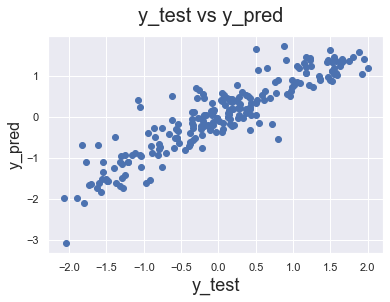

In [95]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

# R-squared score

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m)

0.8233224427085021

We can see that the equation of our best fitted line is:

$ cnt = -0.4393   \times  holiday + 0.4774  \times  temp -0.0967 \times hum -0.1411 \times windspeed -0.2724 \times season_spring + 0.1821 \times season_summer + 0.4703 \times season_winter  -0.1782\times mnth_December -0.2031 \times mnth_January -0.2333 \times mnth_July -0.1883 \times mnth_November  +0.3267 \times mnth_September  +1.0274 \times yr_2019  -0.2071 \times weekday_Sunday  -1.1438 \times weathersit_Light_Snow -0.2656 \times weathersit_Mist_Cloudy $

# Significant variables to predict the demand for shared bikes

- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)